## Setup

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import glob
import os 
import shutil

## Police Data Cleaning

In [2]:
df = pd.read_csv('Mapping Police Violence-Grid view.csv')
mpv = df[['cause_of_death','race','date','officer_charged','allegedly_armed']]
#renaming "allegedly_armed" to "armed"
mpv = mpv.rename(columns={'allegedly_armed': 'armed'})
mpv

,cause_of_death,race,date,officer_charged,armed
0,NaN,Black,3/14/2022,NaN,Allegedly Armed
1,NaN,White,3/12/2022,NaN,Allegedly Armed
2,Gunshot,White,3/12/2022,No Known Charges,Allegedly Armed
3,Gunshot,NaN,3/12/2022,No Known Charges,Allegedly Armed
4,Gunshot,White,3/11/2022,No Known Charges,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,1/1/2013,No Known Charges,Unclear
10071,Gunshot,Black,1/1/2013,No Known Charges,Allegedly Armed
10072,Gunshot,White,1/1/2013,No Known Charges,Allegedly Armed
10073,Gunshot,Hispanic,1/1/2013,No Known Charges,Allegedly Armed


In [3]:
# Converting 'date' column into datatype 'pandas Timestamp'

mpv['date'] = pd.to_datetime(mpv['date'], infer_datetime_format=True)
mpv

,cause_of_death,race,date,officer_charged,armed
0,NaN,Black,2022-03-14,NaN,Allegedly Armed
1,NaN,White,2022-03-12,NaN,Allegedly Armed
2,Gunshot,White,2022-03-12,No Known Charges,Allegedly Armed
3,Gunshot,NaN,2022-03-12,No Known Charges,Allegedly Armed
4,Gunshot,White,2022-03-11,No Known Charges,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,2013-01-01,No Known Charges,Unclear
10071,Gunshot,Black,2013-01-01,No Known Charges,Allegedly Armed
10072,Gunshot,White,2013-01-01,No Known Charges,Allegedly Armed
10073,Gunshot,Hispanic,2013-01-01,No Known Charges,Allegedly Armed


In [130]:
type(mpv['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Removing incidents occuring on and after 2022-1-1 as we do not have tweets after that period
cutoff_date = pd.Timestamp(2022, 1, 1)

mpv = mpv[mpv.date < cutoff_date]

# Setting date as index
mpv.set_index('date')

,cause_of_death,race,officer_charged,armed
date,,,,
2021-12-31,Gunshot,Unknown race,No Known Charges,Vehicle
2021-12-31,Gunshot,Unknown race,No Known Charges,Allegedly Armed
2021-12-29,Gunshot,Black,No Known Charges,Allegedly Armed
2021-12-29,Gunshot,Black,No Known Charges,Unclear
2021-12-28,Gunshot,Black,No Known Charges,Allegedly Armed
...,...,...,...,...
2013-01-01,Gunshot,Hispanic,No Known Charges,Unclear
2013-01-01,Gunshot,Black,No Known Charges,Allegedly Armed
2013-01-01,Gunshot,White,No Known Charges,Allegedly Armed


In [7]:
print(mpv['race'].unique())
print(mpv['cause_of_death'].unique())
print(mpv['armed'].unique())

['Unknown race' 'Black' 'Hispanic' 'White' 'Pacific Islander'
 'Native American' 'Asian' nan]
['Gunshot' 'Gunshot,Taser' 'Taser' 'Beaten' 'Vehicle' 'Physical Restraint'
 'Taser,Physical Restraint' 'Gunshot,Vehicle' 'Other' 'Chemical Agent'
 'Bean bag' 'Pepper Spray' 'Asphyxiated' 'Bomb' nan]
['Vehicle' 'Allegedly Armed' 'Unclear'
 'Unarmed/Did Not Have Actual Weapon' nan]


In [8]:
# Removing 'unknown race'
mpv = mpv[mpv['race'] != 'Unknown race']

In [9]:
mpv['armed'].value_counts()

Allegedly Armed                       6338
Unarmed/Did Not Have Actual Weapon    1244
Unclear                                795
Vehicle                                578
Name: armed, dtype: int64

In [10]:
mpv['cause_of_death'].value_counts()
#proportion of gunshot vs taser, assign to gunshot then

Gunshot                     8265
Gunshot,Taser                270
Taser                        268
Physical Restraint            49
Vehicle                       43
Beaten                        31
Asphyxiated                    8
Other                          6
Pepper Spray                   5
Taser,Physical Restraint       4
Gunshot,Vehicle                2
Chemical Agent                 1
Bomb                           1
Bean bag                       1
Name: cause_of_death, dtype: int64

In [11]:
print(mpv['officer_charged'].unique())

['No Known Charges' 'Charged with a crime' '"Charged, Charges Dropped"'
 '"Charged, Convicted of Manslaughter"' nan
 '"Charged, Convicted, Sentenced to 22.5 years in prison"'
 '"Charged, Convicted"'
 '"Charged, Convicted, Sentenced to life in prison"'
 '"Charged, Convicted, Sentenced to 10 years in prison"'
 '"Charged, Convicted, Sentenced to 7 years in prison"'
 '"Charged, Acquitted"'
 '"Charged, Plead Guilty to Voluntary Manslaughter"'
 '"Charged, Convicted, Sentenced to 1 year in prison and 4 years probation"'
 '"Charged, Convicted, Sentenced to 25 years in prison"'
 '"Charged, Convicted, Sentenced to 2 years suspension and 3 years probation"'
 '"Charged, Convicted, Sentenced to 5-15 years in prison"'
 '"Charged, Convicted, Sentenced to 4.75 years in prison"'
 '"Charged, Mistrial"'
 '"Charged, Convicted, Sentenced to 15 years in prison"'
 '"Charged, Plead No Contest, Sentenced to 10 years probation"'
 '"Charged, Convicted, Sentenced to 6 years in prison"'
 '"Charged, Convicted, Sent

In [12]:
#cleaning "officer_charged"

mpv['officer_charged'] = mpv['officer_charged'].astype(str)

mpv.loc[mpv['officer_charged'].str.contains('Charged') == True, "officer_charged"] = "Charged"
mpv.loc[mpv['officer_charged'] == 'No Known Charges', 'officer_charged'] = "Not Charged"
mpv.loc[mpv['officer_charged'] == 'nan', 'officer_charged'] = "Unknown"
mpv

,cause_of_death,race,date,officer_charged,armed
172,Gunshot,Black,2021-12-29,Not Charged,Allegedly Armed
173,Gunshot,Black,2021-12-29,Not Charged,Unclear
174,Gunshot,Black,2021-12-28,Not Charged,Allegedly Armed
178,Gunshot,Hispanic,2021-12-27,Not Charged,Allegedly Armed
180,Gunshot,Black,2021-12-27,Not Charged,Unclear
...,...,...,...,...,...
10070,Gunshot,Hispanic,2013-01-01,Not Charged,Unclear
10071,Gunshot,Black,2013-01-01,Not Charged,Allegedly Armed
10072,Gunshot,White,2013-01-01,Not Charged,Allegedly Armed
10073,Gunshot,Hispanic,2013-01-01,Not Charged,Allegedly Armed


In [13]:
print(mpv['officer_charged'].unique())
type(mpv['officer_charged'].iloc[0])

['Not Charged' 'Charged' 'Unknown']


str

In [14]:
print(mpv['officer_charged'].unique())

['Not Charged' 'Charged' 'Unknown']


In [15]:
mpv.dtypes
#probably nan

cause_of_death             object
race                       object
date               datetime64[ns]
officer_charged            object
armed                      object
dtype: object

In [16]:
#why the heck is it object and not int

## Variables

### Cause of Death

Variable name: cause_of_death

Data type: string

Lists cause of death of police victims. Includes: NaN, gunshot, vehicle, taser, beaten, physical restraint, chemical agent, bean bag, pepper spray, asphyxiated, bomb, or multiple causes.

### Victim's Race

Variable name: race

Data type: string

Race of police victim, includes NaN, Black, White, Hispanic, Non-white, Unknown race, Pacific Islander, Native American, or Asian

### Date of Encounter

Variable name: date

Data type: pandas Timestamp

Dates from 1/1/2013 to 10/1/2020 (MM/DD/YY)

### Officer Charged

Variable name: officer_charged

Data type: string

Whether or not the police officer responsible for violence any criminal or civil charges.

### Victim Armed

Variable name (in original date): allegedly_armed

Variable name (in our data): armed

Data type: string

Whether or not victim was armed.

## Police EDA

### Overview

In [5]:
# Temporarily adding a count column to help in making pivot tables. This will be dropped later.
mpv['count'] = 1
# Temporarily adding a year column to help in making pivot tables. This will be dropped later.
mpv['year'] = pd.DatetimeIndex(mpv['date']).year

deaths_over_time = mpv.groupby('year', as_index=False).count()
deaths_table = deaths_over_time[['year', 'count']].copy()
deaths_table

C:\Users\dmusa\AppData\Local\Temp\ipykernel_31060\4133803289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpv['count'] = 1
C:\Users\dmusa\AppData\Local\Temp\ipykernel_31060\4133803289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpv['year'] = pd.DatetimeIndex(mpv['date']).year


,year,count
0,2013,1087
1,2014,1049
2,2015,1102
3,2016,1070
4,2017,1092
5,2018,1144
6,2019,1096
7,2020,1128
8,2021,1137


We can graph this table to get a visual representation of this.

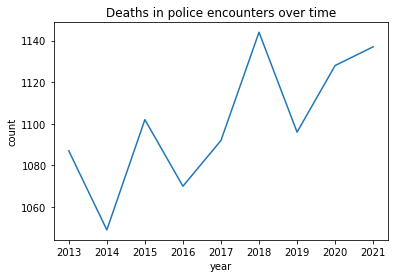

In [6]:
prop_charged_vs_time = sns.lineplot(
    data=deaths_table,
    x='year',
    y='count',
    ).set(title = "Deaths in police encounters over time")

### Victim's Race

Initial summary statistics

<AxesSubplot:title={'center':"Victim's Race Counts"}>

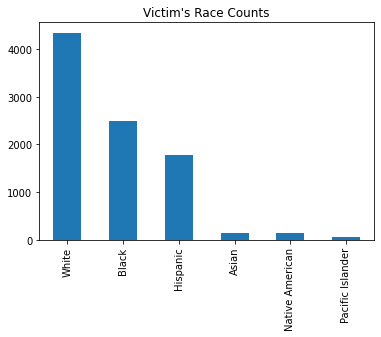

In [19]:
mpv['race'].value_counts().plot(kind='bar', title="Victim's Race Counts")

We observe that the majority of victims were White, followed by Black, with the Pacific Islander category exhibiting the fewest victim cases. More specifically, in terms of percentages:

In [20]:
mpv['race'].value_counts() / len(mpv['race'])

White               0.485485
Black               0.278026
Hispanic            0.198191
Asian               0.015967
Native American     0.015520
Pacific Islander    0.006699
Name: race, dtype: float64

Next, we seek to view race in relation to cause of death. Did certain racial groups experience certain treatment?

In [21]:
race_cd = pd.pivot_table(data=(mpv.groupby(['cause_of_death','race']).count())[['date']],
                         index='cause_of_death',columns='race',aggfunc=np.sum)
race_cd

date                                   \
race                      Asian   Black Hispanic Native American   
cause_of_death                                                     
Asphyxiated                 NaN     1.0      1.0             NaN   
Bean bag                    NaN     NaN      NaN             NaN   
Beaten                      1.0     9.0      8.0             1.0   
Bomb                        NaN     1.0      NaN             NaN   
Chemical Agent              NaN     NaN      NaN             NaN   
Gunshot                   132.0  2259.0   1627.0           131.0   
Gunshot,Taser               4.0    79.0     56.0             4.0   
Gunshot,Vehicle             NaN     NaN      1.0             NaN   
Other                       NaN     2.0      3.0             NaN   
Pepper Spray                NaN     2.0      1.0             NaN   
Physical Restraint          4.0    18.0     15.0             NaN   
Taser                       2.0   100.0     54.0             3.0   
Taser,Physical Restraint    NaN     1.0      1.0             NaN   
Vehicle                     NaN    18.0      7.0             NaN   

                                                   
race                     Pacific Islander   White  
cause_of_death                                     
Asphyxiated                           NaN     6.0  
Bean bag                              NaN     1.0  
Beaten                                NaN    12.0  
Bomb                                  NaN     NaN  
Chemical Agent                        NaN     1.0  
Gunshot                              53.0  4063.0  
Gunshot,Taser                         5.0   122.0  
Gunshot,Vehicle                       NaN     1.0  
Other                                 NaN     1.0  
Pepper Spray                          NaN     2.0  
Physical Restraint                    1.0    11.0  
Taser                                 1.0   107.0  
Taser,Physical Restraint              NaN     2.0  
Vehicle                               NaN    18.0

In [22]:
race_cd.idxmax()

      race            
date  Asian               Gunshot
      Black               Gunshot
      Hispanic            Gunshot
      Native American     Gunshot
      Pacific Islander    Gunshot
      White               Gunshot
dtype: object

Here we actually see that gunshot was the most common cause of death across all races.

Next, let's see how victim race relates to year of incident.

In [23]:
mpv['yr'] = pd.DatetimeIndex(mpv['date']).year
race_yr = pd.pivot_table(data=(mpv.groupby(['yr','race']).count())[['date']],
                         index='yr',columns='race',aggfunc=np.sum)
race_yr

date                                                      
race Asian Black Hispanic Native American Pacific Islander White
yr                                                              
2013    19   291      169               5                2   430
2014    16   276      183              10                5   480
2015    29   305      195              13                4   543
2016    14   279      195              23                6   533
2017    12   278      226              28                6   509
2018    15   265      213              20               11   512
2019    17   282      206              13               10   449
2020    12   249      201              13                8   412
2021     9   265      187              14                8   480

<AxesSubplot:title={'center':'Time Series of Victim Race from 2013 to 2021'}, xlabel='yr', ylabel='count'>

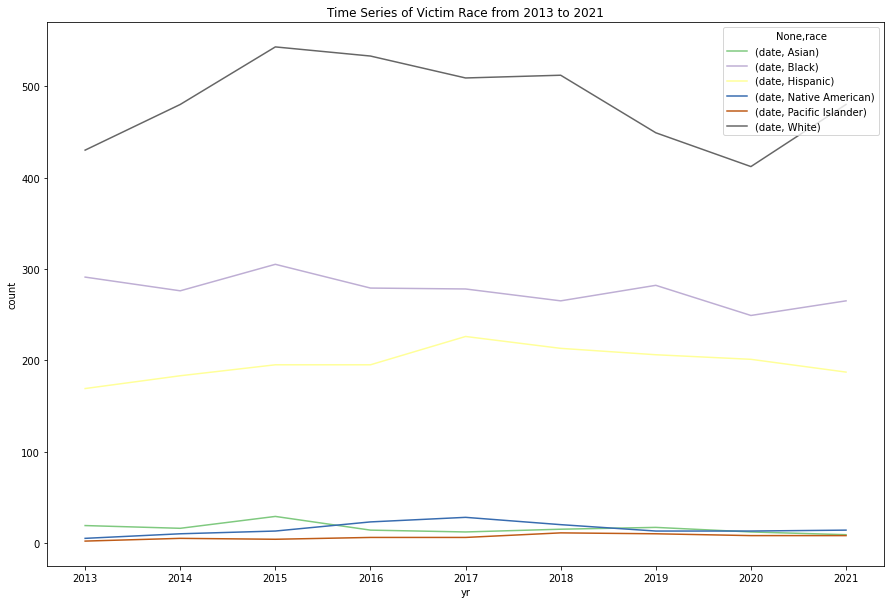

In [24]:
race_yr.plot(figsize=(15,10),title='Time Series of Victim Race from 2013 to 2021'
            ,ylabel='count',
            colormap='Accent')

From this time series, we can observe most notably that the number of white victims saw a drastic decline from 2018 to 2020, and the number of black victims steeply declined from 2019 to 2020. **However, we do see a steady increase in 'unknown race' during these periods of supposed decreases in police brutality, which could suggest that an increased lack of victim race reporting could be the cause of these decreases.**

Lastly, let's look at victim race in relation to whether they were allegedly armed.

In [25]:
race_arm = pd.pivot_table(data=(mpv.groupby(['armed','race']).count())[['date']],
                        index='armed',columns='race',aggfunc=np.sum)
race_arm

date                                 \
race                               Asian Black Hispanic Native American   
armed                                                                     
Allegedly Armed                      115  1710     1213              86   
Unarmed/Did Not Have Actual Weapon    15   409      249              19   
Unclear                                9   192      194              30   
Vehicle                                4   179      119               4   

                                                           
race                               Pacific Islander White  
armed                                                      
Allegedly Armed                                  41  3173  
Unarmed/Did Not Have Actual Weapon                8   544  
Unclear                                           3   367  
Vehicle                                           8   264

In [26]:
race_arm.idxmax()

      race            
date  Asian               Allegedly Armed
      Black               Allegedly Armed
      Hispanic            Allegedly Armed
      Native American     Allegedly Armed
      Pacific Islander    Allegedly Armed
      White               Allegedly Armed
dtype: object

Allegedly armed was the most common case among all races.

### Officer Charged

We can start by looking at the data in the Officer Charged column to see some general statistics. Since the data is categorical, numerical analysis within this column is limited.

In [27]:
mpv['officer_charged'].value_counts()

Not Charged    8771
Charged         183
Unknown           2
Name: officer_charged, dtype: int64

As we can see, the officers were only charged in 160 cases, which is only 1.88% of all cases. Officers did not face any charges in 8311 cases, which represents 98.12% of cases.

We can look at the breakdown of when officers were charged grouped by the race of the victim:

In [28]:
# Temporarily adding a count column to help in making the pivot table. This will be dropped later.
mpv['count'] = 1
oc_by_race = mpv.groupby(['officer_charged', 'race']).count()
oc_by_race

cause_of_death  date  armed  count  year  \
officer_charged race                                                         
Charged         Asian                          3     3      3      3     3   
                Black                         84    84     84     84    84   
                Hispanic                      23    23     23     23    23   
                Native American                3     3      3      3     3   
                Pacific Islander               3     3      3      3     3   
                White                         67    67     67     67    67   
Not Charged     Asian                        140   140    140    140   140   
                Black                       2405  2405   2405   2405  2405   
                Hispanic                    1751  1752   1752   1752  1752   
                Native American              136   136    136    136   136   
                Pacific Islander              57    57     57     57    57   
                White                       4280  4281   4281   4281  4281   
Unknown         Black                          1     1      1      1     1   

                                    yr  
officer_charged race                    
Charged         Asian                3  
                Black               84  
                Hispanic            23  
                Native American      3  
                Pacific Islander     3  
                White               67  
Not Charged     Asian              140  
                Black             2405  
                Hispanic          1752  
                Native American    136  
                Pacific Islander    57  
                White             4281  
Unknown         Black                1

In [29]:
obr_pvt_table = oc_by_race.pivot_table(index=['race'], columns='officer_charged', values='count', fill_value=0, aggfunc=np.sum)
obr_pvt_table['Prop. Charged'] = 100 * obr_pvt_table['Charged'] / (obr_pvt_table['Charged'] + obr_pvt_table['Not Charged'] + obr_pvt_table['Unknown'])
obr_pvt_table

officer_charged,Charged,Not Charged,Unknown,Prop. Charged
race,,,,
Asian,3,140,0,2.097902
Black,84,2405,1,3.373494
Hispanic,23,1752,0,1.295775
Native American,3,136,0,2.158273
Pacific Islander,3,57,0,5.000000
White,67,4281,0,1.540938


We can graph this data in a stacked bar chart:

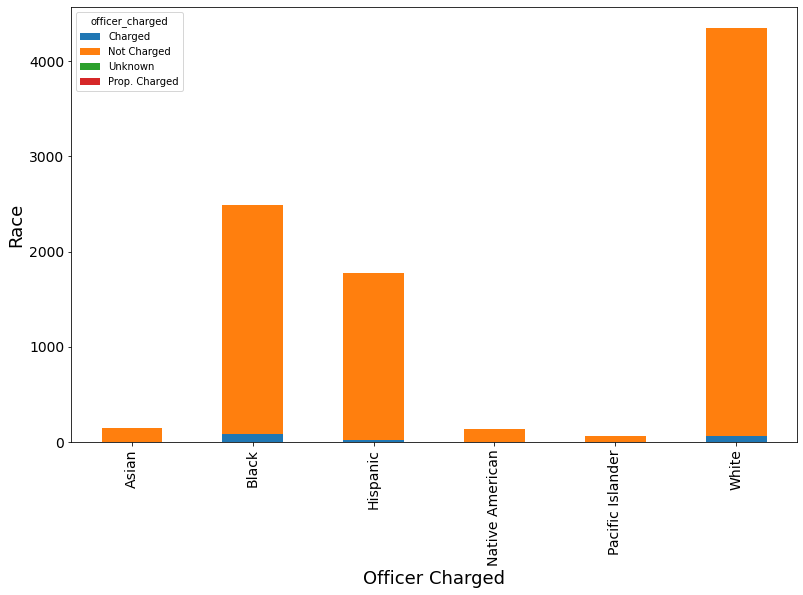

In [30]:
obr_pvt_table.plot.bar(figsize=(13,8), stacked=True)

plt.ylabel('Race', fontsize=18)
plt.xlabel('Officer Charged', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
# Not very useful due to small quantities

In [31]:
# if 'count' in mpv.columns:
#     mpv.drop('count', axis=1, inplace=True)

We can also see how the proportion of of cases in which officers were charged has changed over time.

In [32]:
oc_by_time = mpv.groupby(['officer_charged', 'year']).count()
obt_pvt_table = oc_by_time.pivot_table(index=['year'], columns='officer_charged', values='count', fill_value=0, aggfunc=np.sum)
obt_pvt_table['Prop. Charged'] = 100 * obt_pvt_table['Charged'] / (obt_pvt_table['Charged'] + obt_pvt_table['Not Charged'] + obt_pvt_table['Unknown'])
obt_pvt_table

officer_charged,Charged,Not Charged,Unknown,Prop. Charged
year,,,,
2013,19,897,0,2.074236
2014,19,950,1,1.958763
2015,25,1064,0,2.295684
2016,20,1030,0,1.904762
2017,19,1040,0,1.794145
2018,16,1020,0,1.544402
2019,26,951,0,2.661208
2020,23,872,1,2.566964
2021,16,947,0,1.661475


Graphing this data to see any trends in the proportion of officers being charged over time:

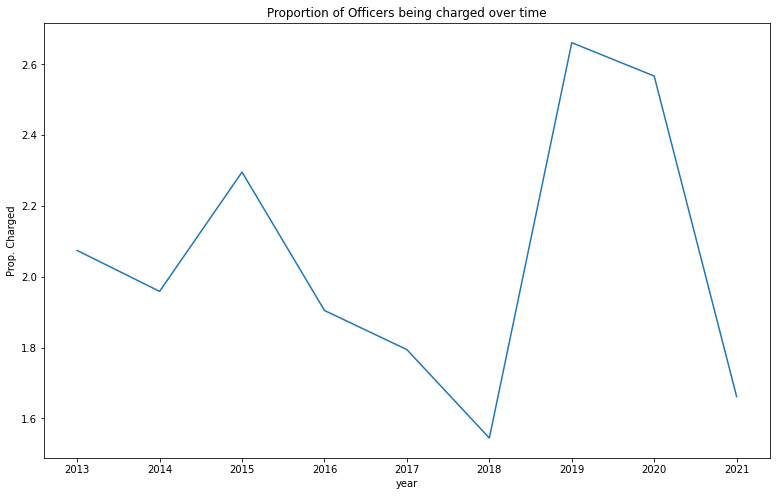

In [33]:
plt.figure(figsize=(13, 8))

prop_charged_vs_time = sns.lineplot(
    data=obt_pvt_table,
    x='year',
    y="Prop. Charged",
    ).set(title = "Proportion of Officers being charged over time")

We can also look at the race makeup of the victims in the cases where the officers were charged.

In [34]:
charged_by_race = oc_by_race.drop({'Not Charged', 'Unknown'})
cbr_pvt_table = charged_by_race.pivot_table(index=['race'], columns='officer_charged', values='count', fill_value=0, aggfunc=np.sum)
cbr_pvt_table['Proportion'] = 100 * cbr_pvt_table['Charged'] / cbr_pvt_table['Charged'].sum()
cbr_pvt_table

officer_charged,Charged,Proportion
race,,
Asian,3,1.639344
Black,84,45.901639
Hispanic,23,12.568306
Native American,3,1.639344
Pacific Islander,3,1.639344
White,67,36.612022


Let's make a pie chart of this, and compare it to a pie chart of the proportion of races in the US.

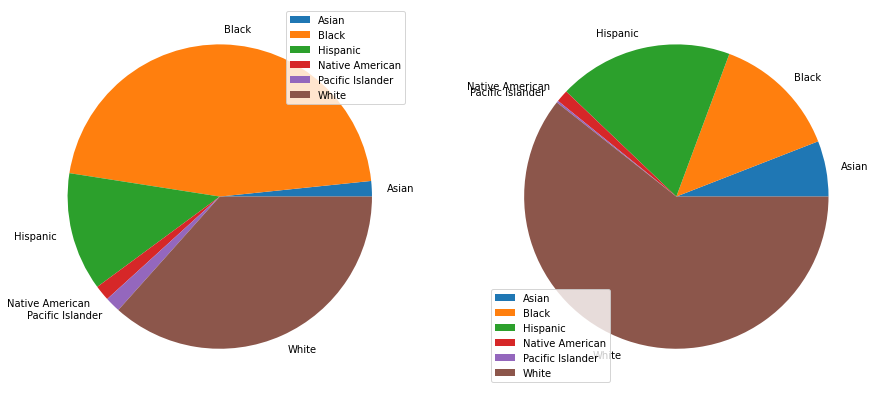

In [35]:
# Source: July 2021 Estimates by US Census Bureau, link: https://www.census.gov/quickfacts/fact/table/US/PST045221
cbr_pvt_table['USRace Prop.'] = (5.9, 13.4, 18.5, 1.3, 0.2, 60.5)
cbr_pvt_table.drop('Charged', axis=1).plot.pie(figsize=(15,10), subplots=True, ylabel='')

plt.show()

As we can see, the charts show there is a large disparity between the racial makeup of the US and the racial makeup of police killing victims. Specifically, people of color, especially black Americans, make up nearly half of all deaths despite making up under one-seventh of the US population. Despite white Americans making up over 60% of the population, they account for under 40% of the deaths in police encounters.

We can adjust the numbers to account for this by changing the data from raw values to deaths per 1,000,000 population in the US. This way, we will be able to see the proportion of the different races while accounting for their non-uniformity in the US population.

In [36]:
cbr_pvt_table['Population-adjusted Count (per 1,000,000 US Pop)'] = 1000000 * cbr_pvt_table['Charged'] / tuple([k*1000000 for k in (5.9, 13.4, 18.5, 1.3, 0.2, 60.5)])
cbr_pvt_table

officer_charged,Charged,Proportion,USRace Prop.,"Population-adjusted Count (per 1,000,000 US Pop)"
race,,,,
Asian,3,1.639344,5.9,0.508475
Black,84,45.901639,13.4,6.268657
Hispanic,23,12.568306,18.5,1.243243
Native American,3,1.639344,1.3,2.307692
Pacific Islander,3,1.639344,0.2,15.000000
White,67,36.612022,60.5,1.107438


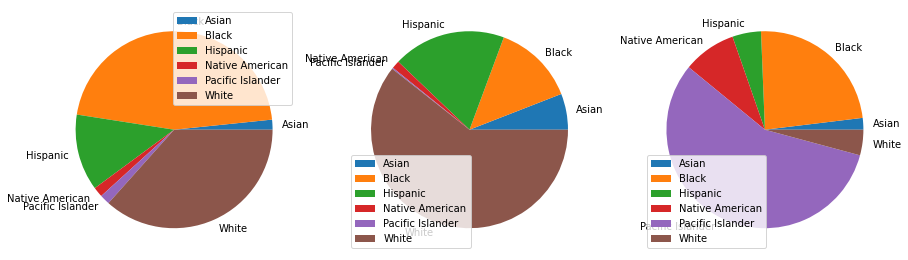

In [37]:
cbr_pvt_table.drop('Charged', axis=1).plot.pie(figsize=(15,10), subplots=True, ylabel='')

plt.show()

As we can see, the population-adjusted chart on the right shows the true proportion of the races of the victims, and they are far from uniform. Pacific Islanders, Black people and Native Americans are the most likely to be victims, while White and Asian Americans are the least likely.

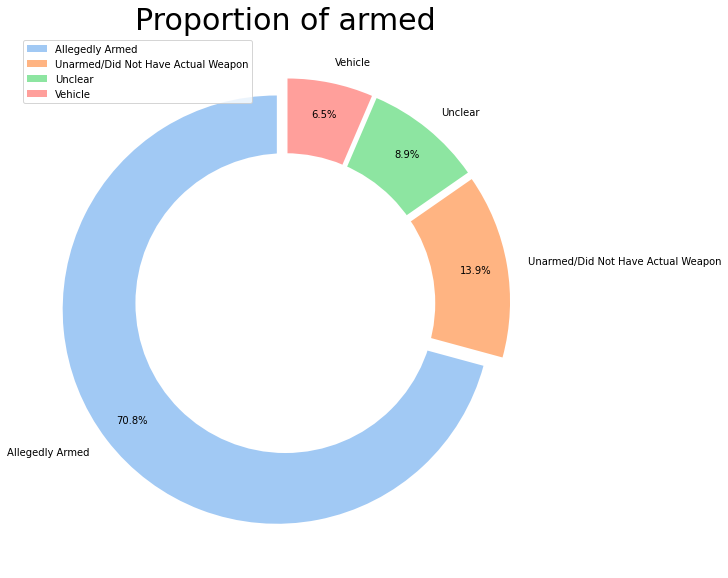

In [38]:
label = []
count = []
for i, j in mpv.groupby('armed'):
    label.append(i)
    count.append(j.shape[0])
fig = plt.figure(figsize=(10, 10))
colors = sns.color_palette('pastel')[0:13]
explode = (0.05, 0.05, 0.05, 0.05)
plt.pie(count, labels = label, colors=colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.legend()
plt.title("Proportion of armed",fontsize=30)
plt.show()

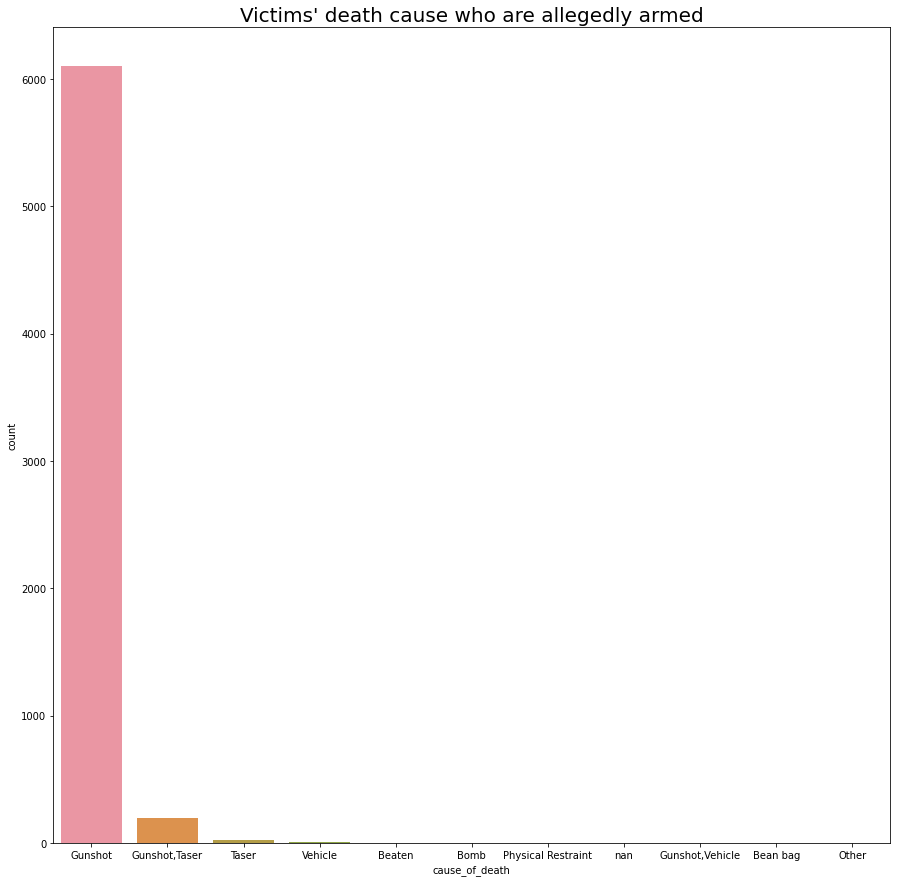

In [39]:
armed = mpv[mpv['armed'] == 'Allegedly Armed']
fig = plt.figure(figsize=(15, 15))
sns.countplot(x="cause_of_death", data=armed, order = armed['cause_of_death'].unique())
plt.title("Victims' death cause who are allegedly armed",fontsize=20)
plt.show()

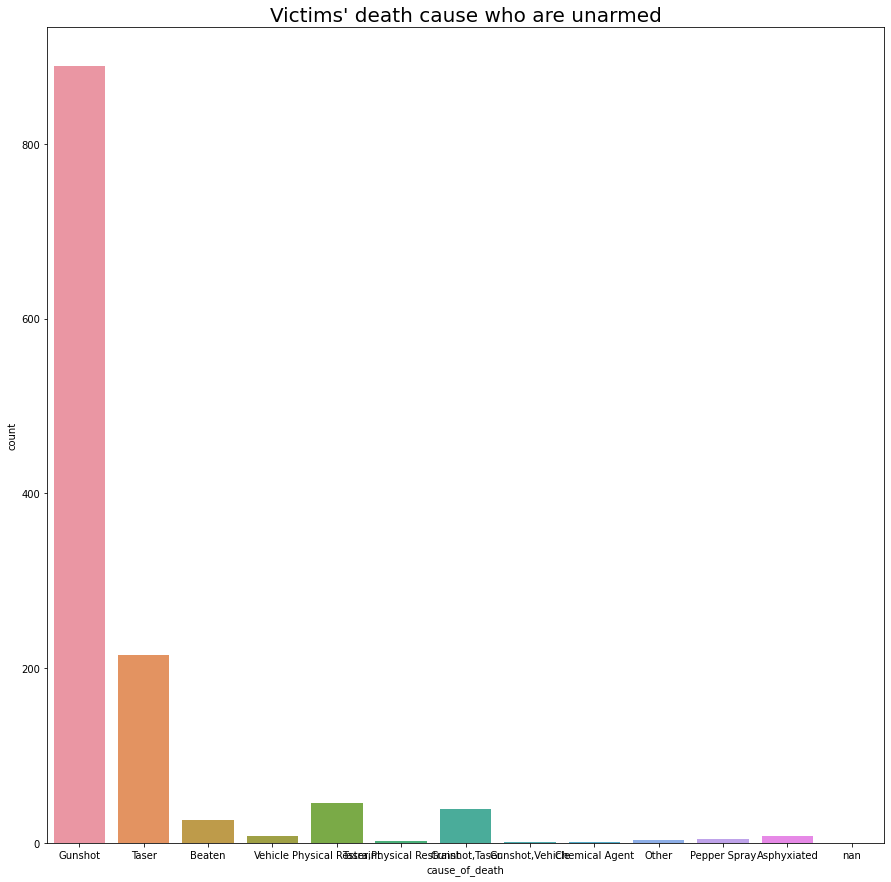

In [40]:
armed = mpv[mpv['armed'] == 'Unarmed/Did Not Have Actual Weapon']
fig = plt.figure(figsize=(15, 15))
sns.countplot(x="cause_of_death", data=armed, order = armed['cause_of_death'].unique())
plt.title("Victims' death cause who are unarmed",fontsize=20)
plt.show()

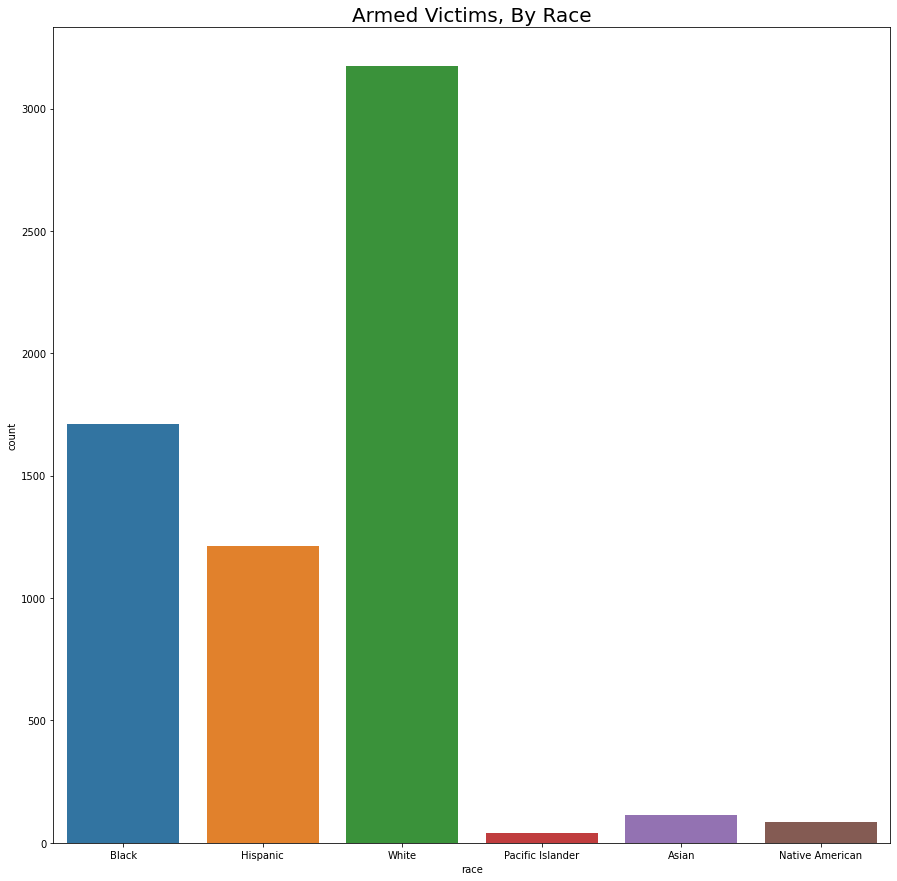

In [41]:
armed = mpv[mpv['armed'] == 'Allegedly Armed']
fig = plt.figure(figsize=(15, 15))
sns.countplot(x="race", data=armed, order = armed['race'].unique())
plt.title("Armed Victims, By Race",fontsize=20)
plt.show()

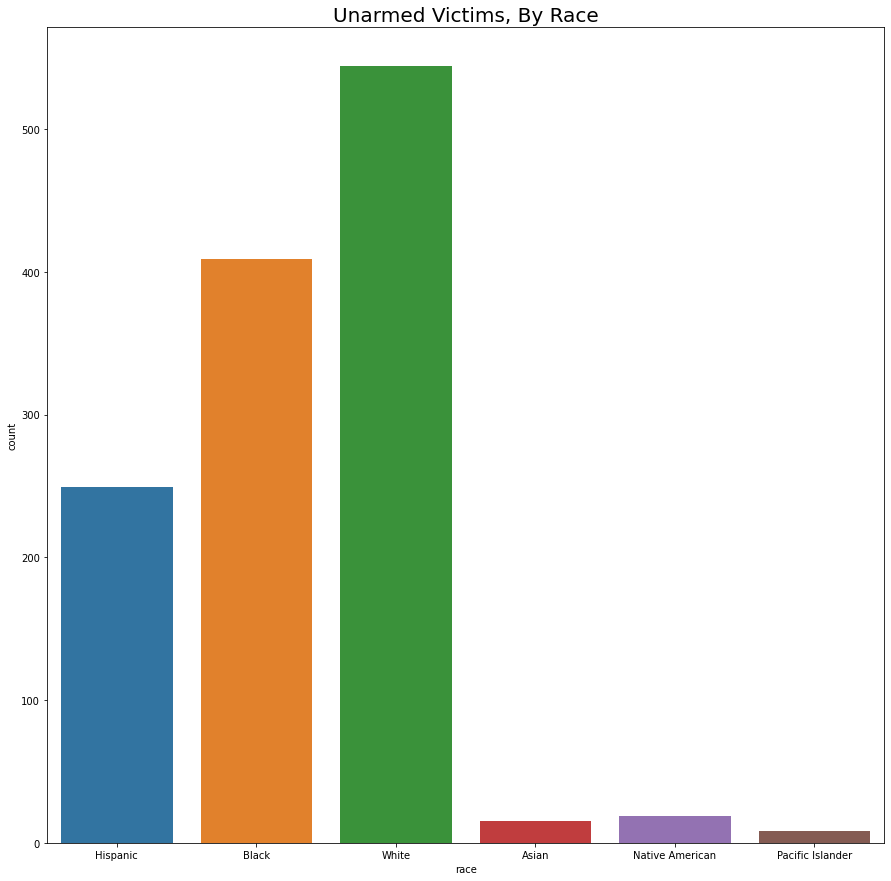

In [41]:
armed = mpv[mpv['armed'] == 'Unarmed/Did Not Have Actual Weapon']
fig = plt.figure(figsize=(15, 15))
sns.countplot(x="race", data=armed, order = armed['race'].unique())
plt.title("Unarmed Victims, By Race",fontsize=20)
plt.show()

## Twitter Data

Let's look at the count of total tweets per year.

In [8]:
by_year_path = "/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/"
by_year_file = [by_year_path + f for f in os.listdir(by_year_path)]
by_year_file

['/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2013',
 '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2014',
 '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2015',
 '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2016',
 '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2017',
 '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2018',
 '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2019',
 '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2020',
 '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2021']

In [9]:
def combine(directory):
   os.chdir(directory)
   extension = "csv"
   all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
   combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
   return combined_csv

In [10]:
year_2013 = combine('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2013')
year_2014 = combine('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2014')
year_2015 = combine('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2015')
year_2016 = combine('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2016')
year_2017 = combine('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2017')
year_2018 = combine('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2018')
year_2019 = combine('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2019')
year_2020 = combine('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2020')
year_2021 = combine('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/by_year/2021')

In [11]:
data = {'year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
        'counts': [len(year_2013.index), len(year_2014.index), len(year_2015.index), len(year_2016.index), len(year_2017.index),
        len(year_2018.index), len(year_2019.index), len(year_2020.index), len(year_2021.index)]}

In [13]:
total_count_by_year = pd.DataFrame(data)
total_count_by_year.dtypes

year      int64
counts    int64
dtype: object

We need to combine the multiple csv folders of tweet ids into one big one to then randomlly select tweets to hydrate.

First, we will flatten all folders into one.

In [ ]:
def flatten(directory):
    for dirpath, _, filenames in os.walk(directory, topdown=False):
        for filename in filenames:
            i = 0
            source = os.path.join(dirpath, filename)
            target = os.path.join(directory, filename)

            while os.path.exists(target):
                i += 1
                file_parts = os.path.splitext(os.path.basename(filename))

                target = os.path.join(
                    directory,
                    file_parts[0] + "_" + str(i) + file_parts[1],
                )

            shutil.move(source, target)

            print("Moved ", source, " to ", target)

        if dirpath != directory:
            os.rmdir(dirpath)

            print("Deleted ", dirpath)

#credit to: https://amitd.co/code/python/flatten-a-directory

In [ ]:
flatten(os.path.dirname("/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/twitter"))

Flattened all folders to make combining into one CSV easier.

In [ ]:
tweets_path = "/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/"
file_list = [tweets_path + f for f in os.listdir(tweets_path)]
csv_list = []

In [ ]:
for file in sorted(file_list):
    csv_list.append(pd.read_csv(file).assign(File_Name = os.path.basename(file)))

csv_merged = pd.concat(csv_list, ignore_index=True)
csv_merged.to_csv(tweets_path + 'tweets_full.csv', index=False)

Tweet IDs successfully merged into one big CSV ready to be permutated.

In [ ]:
tweets = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_full.csv')
tweets.head()

In [ ]:
tweets_sample = tweets.sample(n = 2000000)
tweets_sample.head()

Randomly selected 2,000,000 tweet IDs. Now, we need to export back to CSV file with just the IDs to hydrate the tweets.

In [ ]:
tweets_sample_id = tweets_sample['status_id']

In [ ]:
tweets_sample_id.to_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_sample_id2.csv', header=False, index=False)

In [47]:
tweets_ids_full = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_full.csv')
tweets_ids_full.head()

,status_id,blacklivesmatter,alllivesmatter,bluelivesmatter,File_Name
0,296004745028567040,1.0,0.0,0.0,2013-01.csv
1,299022201141735424,0.0,1.0,0.0,2013-02.csv
2,316973754951540737,1.0,0.0,0.0,2013-03.csv
3,315462982803009536,1.0,0.0,0.0,2013-03.csv
4,316242983945129984,1.0,0.0,0.0,2013-03.csv


In [ ]:
tweets_ids = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_sample_id2.csv')

In [ ]:
tweets_ids.rename(columns={'1290186396066385920': 'status_id'}, inplace=True)
tweets_ids.head()

In [ ]:
tweets_ids = tweets_ids.append({'status_id': 1290186396066385920}, ignore_index=True)

In [ ]:
tweets_ids.shape

Tweet IDs from our sample. Merge onto dataframe with labels.

In [ ]:
merged_ids= pd.merge(tweets_ids, tweets_ids_full, on="status_id", how="inner")
merged_ids.shape

In [ ]:
merged_ids

Thank you to Stanley Sisson for creating the next cell!

In [ ]:
# Pandas, for the dataframe
import pandas as pd
# JSON, for reading json objects
import json
# Time for measuring how long it will take
import time
import numpy as np
def currentTime():
    return round(time.time() * 1000)
# Date format changer
import dateutil.parser as parser
def convertDate(t):
    return parser.parse(t).isoformat()
    
# Counting variables
ct = 0          # Number of items done
total = 1928721 # Total items to do

# Timing variables
start = currentTime()
last = start
now = start

# Open the json file in READ mode...
with open('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_sample_id2_hydrated.json','r', encoding="utf8") as f:
    # Open the csv file in WRITE mode...
    with open('tweets.csv','w', encoding="utf8") as f2:
        # Write the CSV header (column names seperated with a comma)
        f2.write('id,time\n')
        
        # For each line in the input file
        for line in f:
            # Read each line as json,
            obj = json.loads(line)
            # Get its ID as a string
            # Get its TIME and parse it to ISO format
            # Write it to output file in CSV format:
            #   - put a comma between values
            #   - end with a newline
            f2.write(str(obj["id"])+","+convertDate(obj["created_at"])+"\n")
            
            # Progress updates
            ct=ct+1
            now = currentTime()
            # If ten seconds have passed, display progress update
            if (last+10000<now):
                dt = (now-start)/1000. # delta time, aka time passed since start
                v = ct/dt              # velocity, aka how fast things are done
                rems = (total-ct)/v    # remaining seconds (total time in seconds)
                remm = round(np.floor(rems/60)) # remaining minutes (from mm:ss)
                rems = round(np.floor(rems%60)) # remaining seconds (from mm:ss)
                # Display
                print(str(ct) + " items loaded in "+str(round(dt))+"s ("+str(round(10000*ct/total)/100)+"% done)")
                print("  "+str(round(v)) + " items per second: "+str(remm)+" min "+str(rems)+" sec left")
                # Update last output time
                last = now

Tweets with time and id.

In [ ]:
C:\Users\dmusa\Documents\UCSD\2021-2022\DDS_BLM\tweets.csv

In [53]:
tweets_id_dates = pd.read_csv("/Users/dmusa/Documents/UCSD/2021-2022/DDS_BLM/tweets.csv")
tweets_id_dates.head()

,id,time
0,1298955271587405800,2020-08-27T12:07:24+00:00
1,1279794731866894300,2020-07-05T15:10:16+00:00
2,1272116933740114000,2020-06-14T10:41:26+00:00
3,1269704052532789200,2020-06-07T18:53:30+00:00
4,1350089310587003000,2021-01-15T14:35:49+00:00


In [54]:
tweets_id_dates.shape

(783236, 2)

Rename so we can merge onto the dataframe with labels.

In [55]:
tweets_id_dates.rename(columns={"id": "status_id"}, inplace=True)
tweets_id_dates.head()

,status_id,time
0,1298955271587405800,2020-08-27T12:07:24+00:00
1,1279794731866894300,2020-07-05T15:10:16+00:00
2,1272116933740114000,2020-06-14T10:41:26+00:00
3,1269704052532789200,2020-06-07T18:53:30+00:00
4,1350089310587003000,2021-01-15T14:35:49+00:00


Merge so we have IDs, time, and labels.

In [56]:
final_tweets = pd.merge(tweets_id_dates, tweets_ids_full, on="status_id", how="inner")
final_tweets.shape

(32524, 6)

In [57]:
final_tweets.head()

,status_id,time,blacklivesmatter,alllivesmatter,bluelivesmatter,File_Name
0,537684004657725440,2014-11-26T19:07:11+00:00,1.0,0.0,0.0,2014-11.csv
1,537684004657725440,2014-11-26T19:07:11+00:00,1.0,0.0,0.0,2014-11.csv
2,1269868146640384000,2020-06-08T05:45:33+00:00,1.0,0.0,0.0,2020-06.csv
3,1269868146640384000,2020-06-08T05:45:33+00:00,1.0,0.0,0.0,2020-06.csv
4,930503267662131200,2017-11-14T18:30:41+00:00,1.0,0.0,0.0,2017-11.csv


Change date into datetime format and remove time.

In [58]:
final_tweets["time"] = pd.to_datetime(final_tweets['time'])
final_tweets["time"] = final_tweets["time"].dt.date
final_tweets['time']= pd.to_datetime(final_tweets['time'])
final_tweets['time']

0       2014-11-26
1       2014-11-26
2       2020-06-08
3       2020-06-08
4       2017-11-14
           ...    
32519   2020-08-20
32520   2014-12-14
32521   2014-12-14
32522   2020-07-01
32523   2020-07-01
Name: time, Length: 32524, dtype: datetime64[ns]

Rename columns to shorten.

In [59]:
final_tweets.rename(columns={"blacklivesmatter": "blm","alllivesmatter":"alm","bluelivesmatter":"blulm"}, inplace=True)
final_tweets.head()

,status_id,time,blm,alm,blulm,File_Name
0,537684004657725440,2014-11-26,1.0,0.0,0.0,2014-11.csv
1,537684004657725440,2014-11-26,1.0,0.0,0.0,2014-11.csv
2,1269868146640384000,2020-06-08,1.0,0.0,0.0,2020-06.csv
3,1269868146640384000,2020-06-08,1.0,0.0,0.0,2020-06.csv
4,930503267662131200,2017-11-14,1.0,0.0,0.0,2017-11.csv


Change labels from one-hot encoded to category labels. First, create new dataframe with just labels.

In [60]:
labels= final_tweets[['blm','alm', 'blulm']]
labels.head()

,blm,alm,blulm
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


Replace 1's with respect label in each column and replace 0's with NaN.

In [61]:
labels['blm'].replace({1:"blm", 0: float("nan")}, inplace=True)
labels['blm']

C:\Users\dmusa\AppData\Local\Temp\ipykernel_34972\1126092795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['blm'].replace({1:"blm", 0: float("nan")}, inplace=True)


0        blm
1        blm
2        blm
3        blm
4        blm
        ... 
32519    blm
32520    NaN
32521    NaN
32522    blm
32523    blm
Name: blm, Length: 32524, dtype: object

In [62]:
labels['alm'].replace({1:"alm", 0: float("nan")}, inplace=True)
labels['alm']

C:\Users\dmusa\AppData\Local\Temp\ipykernel_34972\3944052779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['alm'].replace({1:"alm", 0: float("nan")}, inplace=True)


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32519    NaN
32520    alm
32521    alm
32522    NaN
32523    NaN
Name: alm, Length: 32524, dtype: object

In [63]:
labels['blulm'].replace({1:"blulm", 0: float("nan")}, inplace=True)
labels['blulm']

C:\Users\dmusa\AppData\Local\Temp\ipykernel_34972\2821707966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['blulm'].replace({1:"blulm", 0: float("nan")}, inplace=True)


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32519    NaN
32520    NaN
32521    NaN
32522    NaN
32523    NaN
Name: blulm, Length: 32524, dtype: object

Flatten three columns into one with labels.

In [64]:
labels['alm'].loc[labels['blm'].loc[~labels['blm'].isnull()].index] = 'blm'
labels['alm'].loc[labels['blulm'].loc[~labels['blulm'].isnull()].index] = 'blulm'
print(labels['alm'])

C:\Users\dmusa\AppData\Local\Temp\ipykernel_34972\4290031881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['alm'].loc[labels['blm'].loc[~labels['blm'].isnull()].index] = 'blm'


0        blm
1        blm
2        blm
3        blm
4        blm
        ... 
32519    blm
32520    alm
32521    alm
32522    blm
32523    blm
Name: alm, Length: 32524, dtype: object


C:\Users\dmusa\AppData\Local\Temp\ipykernel_34972\4290031881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['alm'].loc[labels['blulm'].loc[~labels['blulm'].isnull()].index] = 'blulm'


Rename column.

In [65]:
labels.rename(columns={'alm':'label'}, inplace=True)

C:\Users\dmusa\AppData\Local\Temp\ipykernel_34972\3474713512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels.rename(columns={'alm':'label'}, inplace=True)


In [66]:
labels = labels.drop(columns=['blm', 'blulm'])

In [67]:
labels.head()

,label
0,blm
1,blm
2,blm
3,blm
4,blm


Merge label to final tweet dataframe.

In [68]:
final_tweets = final_tweets.join(labels)

In [69]:
final_tweets.shape

(32524, 7)

In [70]:
final_tweets.head()

,status_id,time,blm,alm,blulm,File_Name,label
0,537684004657725440,2014-11-26,1.0,0.0,0.0,2014-11.csv,blm
1,537684004657725440,2014-11-26,1.0,0.0,0.0,2014-11.csv,blm
2,1269868146640384000,2020-06-08,1.0,0.0,0.0,2020-06.csv,blm
3,1269868146640384000,2020-06-08,1.0,0.0,0.0,2020-06.csv,blm
4,930503267662131200,2017-11-14,1.0,0.0,0.0,2017-11.csv,blm


Convert to CSV so we can access it easier.

In [72]:
tweets_ids_full.head()

,status_id,blacklivesmatter,alllivesmatter,bluelivesmatter,File_Name
0,296004745028567040,1.0,0.0,0.0,2013-01.csv
1,299022201141735424,0.0,1.0,0.0,2013-02.csv
2,316973754951540737,1.0,0.0,0.0,2013-03.csv
3,315462982803009536,1.0,0.0,0.0,2013-03.csv
4,316242983945129984,1.0,0.0,0.0,2013-03.csv


In [73]:
tweets_ids_full['blacklivesmatter'].replace({1:"blm", 0: float("nan")}, inplace=True)
tweets_ids_full['alllivesmatter'].replace({1:"alm", 0: float("nan")}, inplace=True)
tweets_ids_full['bluelivesmatter'].replace({1:"blulm", 0: float("nan")}, inplace=True)

In [74]:
tweets_ids_full['alllivesmatter'].loc[tweets_ids_full['blacklivesmatter'].loc[~tweets_ids_full['blacklivesmatter'].isnull()].index] = 'blm'
tweets_ids_full['alllivesmatter'].loc[tweets_ids_full['bluelivesmatter'].loc[~tweets_ids_full['bluelivesmatter'].isnull()].index] = 'blulm'

In [75]:
tweets_ids_full.rename(columns={'alllivesmatter':'label'}, inplace=True)

In [76]:
tweets_ids_full.shape

(127769598, 5)

## Tweets EDA

Counts by label

<AxesSubplot:title={'center':'Tweet Label Count of Original Dataset'}>

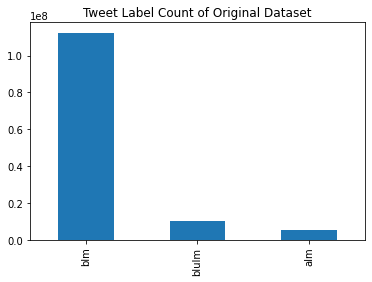

In [77]:
tweets_ids_full['label'].value_counts().plot(kind='bar', title="Tweet Label Count of Original Dataset")

<AxesSubplot:title={'center':'Tweet Label Count of Sample'}>

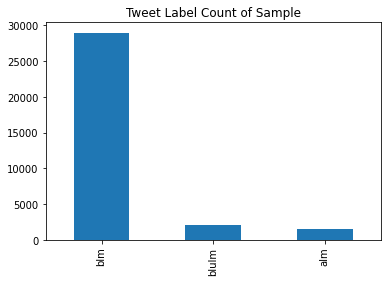

In [78]:
final_tweets['label'].value_counts().plot(kind='bar', title="Tweet Label Count of Sample")

Tweets by year.

### Tweets Over Time

[Text(0.5, 1.0, 'Total Tweets Over Time')]

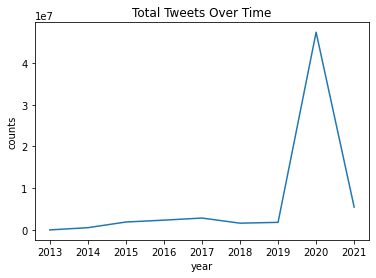

In [14]:
sns.lineplot(
    data=total_count_by_year,
    x='year',
    y='counts',
    ).set(title = "Total Tweets Over Time")

Let's break it down by label.

In [81]:
final_tweets['year'] = pd.DatetimeIndex(final_tweets['time']).year
label_year = pd.pivot_table(data=(final_tweets.groupby(['year','label']).count())[['time']],
                         index='year',columns='label',aggfunc=np.sum)
label_year

time             
label  alm    blm blulm
year                   
2014   104   1258    40
2015   352   1894    56
2016   334   1272   368
2017   108   1262   348
2018    44    722   204
2019    52    648   246
2020   412  19972   656
2021    54   1928   190

<AxesSubplot:title={'center':'Total Tweets Over Time, by Label'}, xlabel='year', ylabel='year'>

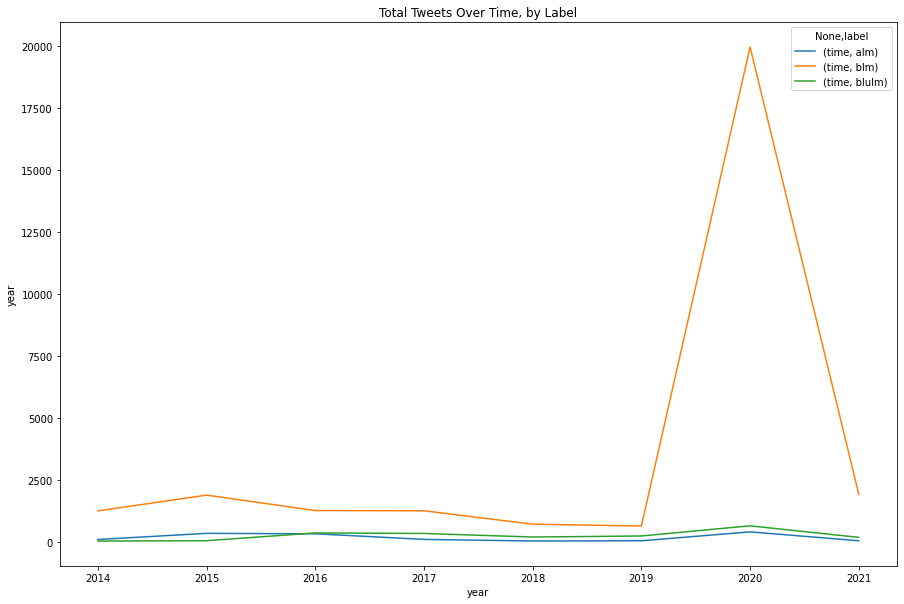

In [82]:
label_year.plot(figsize=(15,10), title='Total Tweets Over Time, by Label', ylabel='year')

Let's look at how the counts of tweets compares with the counts of death caused by police.

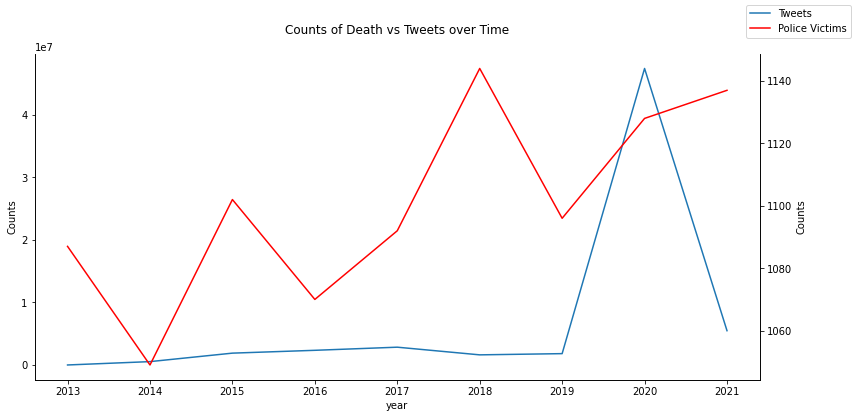

In [20]:
fig, ax = plt.subplots(figsize=(13,6))
#tweets line chart
lineplot = sns.lineplot(x='year', y='counts', data=total_count_by_year, label= 'Tweets', legend=False)
sns.despine()
plt.ylabel('Counts')
plt.title('Counts of Death vs Tweets over Time', pad=20);
#police line chart
ax2 = ax.twinx()
lineplot2 = sns.lineplot(x='year', y='count', data=deaths_table[deaths_table.year <= 2021], ax=ax2, color='r', label='Police Victims', legend=False)
sns.despine(right=False)
plt.ylabel('Counts')
ax.figure.legend();

Now that we have the tweets, let's go over the variables in the dataframe. 

The creators of the dataset categorized each tweet as supporting one of three major movements: Black Lives Matter, All Lives Matter, and Blue Lives Matter. The tweets are one hot encoded. 

The used an assortment of keywords and hashtags, as shown below, to categorize the tweets. These terms have a weight. The weight indicates how unique a term is to the topic. So a "1.0" tells us this term showed up only in that topic.

In [84]:
alm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/alm50.csv')
alm = alm[['term', 'weight']]
alm.sort_values(by=['weight'],ascending=False)
alm.loc[alm['weight'] == 1.0]

,term,weight
8,#bible,1.0
32,#ilovejesus,1.0
38,#lfj,1.0
57,#prayergift,1.0
70,#taniaspeaks,1.0
...,...,...
14471,gsr,1.0
14485,justice4cephus,1.0
14489,misconstrues,1.0
14499,stippling,1.0


In [85]:
blm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/blm100.csv')
blm = blm[['term', 'weight']]
blm.head()
#pd.set_option('display.max_rows', None)
blm.loc[blm['weight'] == 1.0]

,term,weight
33,application,1.0
3072,luther,1.0
4579,#russelllee,1.0
9064,archive,1.0
9306,barack,1.0
...,...,...
44566,walter,1.0
44611,#kohkanta,1.0
44626,#sb50,1.0
45471,#blackqueen,1.0


In [86]:
blulm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/blulm25.csv')
blulm = blulm[['term', 'weight']]
blulm.head()
#pd.set_option('display.max_rows', None)
blulm.loc[blulm['weight'] == 1.0]

,term,weight
0,#axlesgarage,1.0
8,#ghetto,1.0
10,#igotyour6,1.0
13,#jeepwrangler,1.0
14,#lawenforcementofficers,1.0
...,...,...
10025,junior,1.0
10029,leslie,1.0
10043,pearce,1.0
10075,wade,1.0


# Correlation

In [87]:
total_count_by_year

,year,counts
0,2013,1902
1,2014,537748
2,2015,1892016
3,2016,2343874
4,2017,2842851
5,2018,1618370
6,2019,1812953
7,2020,47358076
8,2021,5477009


In [22]:
mpv[mpv['race'] != 'White']

,cause_of_death,race,date,officer_charged,armed,count,year
170,Gunshot,Unknown race,2021-12-31,No Known Charges,Vehicle,1,2021
171,Gunshot,Unknown race,2021-12-31,No Known Charges,Allegedly Armed,1,2021
172,Gunshot,Black,2021-12-29,No Known Charges,Allegedly Armed,1,2021
173,Gunshot,Black,2021-12-29,No Known Charges,Unclear,1,2021
174,Gunshot,Black,2021-12-28,No Known Charges,Allegedly Armed,1,2021
...,...,...,...,...,...,...,...
10068,Gunshot,Unknown race,2013-01-02,No Known Charges,Allegedly Armed,1,2013
10069,Gunshot,Hispanic,2013-01-01,No Known Charges,Allegedly Armed,1,2013
10070,Gunshot,Hispanic,2013-01-01,No Known Charges,Unclear,1,2013
10071,Gunshot,Black,2013-01-01,No Known Charges,Allegedly Armed,1,2013


In [23]:
deaths_over_time_poc = mpv[mpv['race'] != 'White'].groupby('year', as_index=False).count()
deaths_table_poc = deaths_over_time_poc[['year', 'count']].copy()
deaths_table_poc

,year,count
0,2013,657
1,2014,569
2,2015,559
3,2016,537
4,2017,583
5,2018,632
6,2019,647
7,2020,716
8,2021,657


In [30]:
column_1 = total_count_by_year['counts']
column_2 = deaths_table_poc['count']
column_3 = deaths_table['count']

### Pearson's Correlation

Correlation between total counts and all deaths.

In [31]:
column_1.corr(column_3, method='pearson')

0.3789665316253066

Correlation between total counts and only deaths of people of color.

In [25]:
column_1.corr(column_2, method='pearson')

0.6392822140531931

### Spearman's Correlation

Correlation between total counts and all deaths.

In [32]:
column_1.corr(column_3, method='spearman')

0.39999999999999997

Correlation between total counts and only deaths of people of color.

In [33]:
column_1.corr(column_2, method='spearman')

0.20920685218893076

### Kendall's Correlation

Correlation between total counts and all deaths.

In [34]:
column_1.corr(column_3, method='kendall')

0.2777777777777778

Correlation between total counts and only deaths of people of color.

In [35]:
column_1.corr(column_2, method='kendall')

0.14085904245475278

We can see there is a small positive correlation in all correlation measures. This is opposite to what we expected to happen. This suggests there is a small relationship of increased BLM activism on Twitter and increased death by police. 

# Conclusion

We fail to reject the null hypothesis. Increased BLM activism on Twitter did not lead to less deaths by police, especially of people of color. 